## Bank Marketing campaigns of a Portuguese Banking Institution

#### PROBLEM STATEMENT :

The problem is that the Bank Marketing campaigns of a Portuguese banking institution need to identify the factors that cause the customers to tend to take the subscription, as well as Bank Marketing campaigns of a Portuguese banking institution need to identify the reasons behind the customer which make them not take the subscription.

#### Aim :

We are aiming to Determinate/Analysis the factors for the subscription and nonsubscription.

## Check Point 1:

### 1. Firstly, we are importing the dataset of the bank.

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import os 
os.chdir('C:\\Users\\Roopali Sudra\\Downloads\\Project 4-1-1\\Project 4')

In [2]:
bankdf = pd.read_csv("bank.csv")
# Displaying the first few rows of the dataset with the help of .head function 
bankdf.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


#### DATASET DESCRIPTION:

Bank Marketing: The data is related to direct marketing campaigns of a Portuguese banking institution. The marketing campaigns were based on phone calls. Often, more than one contact with the same client was required to assess if the product (bank term deposit) would be (or not) subscribed.


#### DATA DICTIONARY:

1 - age (numeric)

2 - job : type of job (categorical: 
"admin.","unknown","unemployed","management","housemaid","entrepreneur", "student","bluecollar","self-employed","retired","technician","services")

3 - marital : marital status (categorical: "married","divorced","single"; note: "divorced" means 
divorced or widowed)

4 - education (categorical: "unknown","secondary","primary","tertiary")

5 - default: has credit in default? (binary: "yes","no")

6 - balance: average yearly balance, in euros (numeric)

7 - housing: has a housing loan? (binary: "yes","no")

8 - loan: has personal loan? (binary: "yes","no")

- related to the last contact of the current campaign:

9 - contact: contact communication type (categorical: "unknown","telephone","cellular")

10 - day: last contact day of the month (numeric)

11 - month: last contact month of year (categorical: "jan", "feb", "mar", ..., "nov", "dec")

12 - duration: last contact duration, in seconds (numeric)

- other attributes:

13 - campaign: number of contacts performed during this campaign and for this client (numeric, 
includes the last contact

14 - P-days: number of days that passed by after the client was last contacted from a previous 
campaign (numeric, -1 means client was not previously contacted)

15 - previous: number of contacts performed before this campaign and for this client (numeric)

16 - poutcome: outcome of the previous marketing campaign (categorical: 
"unknown","other","failure","success")

- output variable (desired target):

17 - y - has the client subscribed to a term deposit? (binary: "yes","no")



In [3]:
#Displaying the information about the dataset.
bankdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        4521 non-null   int64 
 1   job        4521 non-null   object
 2   marital    4521 non-null   object
 3   education  4521 non-null   object
 4   default    4521 non-null   object
 5   balance    4521 non-null   int64 
 6   housing    4521 non-null   object
 7   loan       4521 non-null   object
 8   contact    4521 non-null   object
 9   day        4521 non-null   int64 
 10  month      4521 non-null   object
 11  duration   4521 non-null   int64 
 12  campaign   4521 non-null   int64 
 13  pdays      4521 non-null   int64 
 14  previous   4521 non-null   int64 
 15  poutcome   4521 non-null   object
 16  y          4521 non-null   object
dtypes: int64(7), object(10)
memory usage: 600.6+ KB


### 2. Now, we are making the data appropriate for our analysis

#### A. In this step we are identifying the features of data types before entering into the analysis.

#### Integer type:

age, balance, day, duration, campaign, pdays, and previous

#### Object type: 

job, marital, education, default, housing, loan, contact, month, poutcome, and y

#### B. There is no need to convert the datatypes here. If the datatypes where wrongly identified according to the business(domain). We could have used the User Defined function and loop to convert the data types.

#### C. In this step we are finding and removing the missing values, if any. 

In [4]:
#This code calculates the number of missing values in each column of the 'bankdf' dataframe
missing_values = bankdf.isnull().sum()
missing_values

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

#### D. In this step, we are trying to find out the duplicates.

In [5]:
#Finding duplicate rows in bankdf DataFrame and assigning them to duplicate_rows variable
duplicate_rows = bankdf[bankdf.duplicated()]

#Writing a python conditional statement to check for any duplicate values.

if len(duplicate_rows) > 0:
    print(f"Found {len(duplicate_rows)} duplicate rows:")
    print(duplicate_rows)
else:
    print("No duplicate rows were found.")

No duplicate rows were found.


In case if we had found any duplicates, we remove the duplicate rows from the data set using the drop_duplicates method of the Pandas DataFrame.

## Check Point 2 :

#### 3. Finding the average balance of the customer who belongs to the subscribed customer and non-subscribed customer and also use a related plot to show them in visualization.

1571.9558541266795
1403.21175


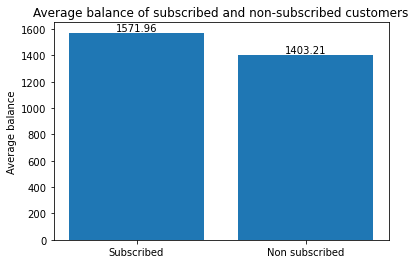

In [7]:
#Calculating the average balance of customers who subscribed to the term deposit.
avg_bal_sub = bankdf[bankdf['y'] == 'yes']['balance'].mean()
print(avg_bal_sub)

#Calculating the average balance of customers who did not subscribed to the term deposit.
avg_bal_nonsub = bankdf[bankdf['y'] == 'no']['balance'].mean()
print(avg_bal_nonsub)

#Creating a bar plot showing the average balance of customers 
plt.bar(['Subscribed','Non subscribed'],[avg_bal_sub,avg_bal_nonsub])
plt.title('Average balance of subscribed and non-subscribed customers')
plt.ylabel('Average balance')

#Add text annotation to show the value of avg_bal_sub on the bar plot.
plt.text(0, avg_bal_sub, round(avg_bal_sub, 2), ha='center', va='bottom')

#Add text label for the average balance of non-subscribed customers on the bar plot
plt.text(1, avg_bal_nonsub, round(avg_bal_nonsub, 2), ha='center', va='bottom')
plt.show()

The results show that term deposit subscribers' average balances are greater (1571.96 euros) than those of non-subscribers. (1403.21 euros). It might be concluded from this that clients with larger balances are more inclined to sign up for a term deposit.

#### 4. Use a pie plot to find the distribution(frequency) of the education. Make sure to add labels and show the percentage of each education distribution.

secondary    2306
tertiary     1350
primary       678
unknown       187
Name: education, dtype: int64


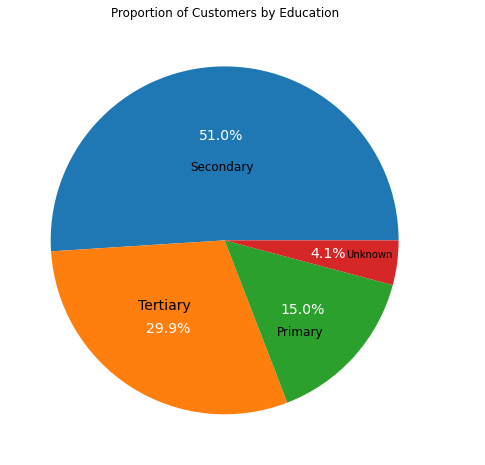

In [8]:
#Counting the number of people with each level of education.
education_counts = bankdf['education'].value_counts()
print(education_counts)

#This code creates a new figure with a size of 10x8 inches.
plt.figure(figsize=(10,8))

#This code creates a pie chart of the distribution of education levels of customers in the bank dataset
#The labels on the slices show the education levels and the percentage of customers with that level of education
#The textprops parameter is used to set the font size and color of the labels.
plt.pie(education_counts,autopct = '%1.1f%%',labels=education_counts.index,textprops={'fontsize': 14, 'color':'white'})

edu_levels = ['Primary', 'Secondary', 'Tertiary', 'Unknown']

#This codes adds a text annotation to the pie plot
plt.text(0.3, -0.55, edu_levels[0], fontsize=12, color='black')
plt.text(-0.2, 0.4, edu_levels[1], fontsize=12, color='black')
plt.text(-0.5, -0.4, edu_levels[2], fontsize=14, color='black')
plt.text(0.7, -0.1, edu_levels[3], fontsize=10, color='black')

plt.title('Proportion of Customers by Education')
plt.show()

According to the pie chart, which represents roughly 51% of the entire dataset, the bulk of the clients had a secondary education. With about 30% of the total, higher education ranks as the second most popular level of education. With almost 15% of all education levels, primary schooling is the third most prevalent level. Only approximately 4% of the total clients are the remaining ones, who are uninformed about education levels.

#### 5. Create a function that should be able to create a new feature(Variable) called season using the month column.

In [9]:
# We are defining a function that maps the month column of the input DataFrame to seasons and adds a new 'season' column
def monthtoseason(df):
    mts = {'jan': 'Winter', 'feb': 'Winter', 'mar': 'Spring', 'apr': 'Spring', 'may': 'Spring',
                       'jun': 'Summer', 'jul': 'Summer', 'aug': 'Summer', 'sep': 'Fall', 'oct': 'Fall',
                       'nov': 'Fall', 'dec': 'Winter'}
    
    df['season'] = df['month'].map(mts)
    
    return df

monthtoseason(bankdf)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y,season
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no,Fall
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no,Spring
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no,Spring
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no,Summer
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no,Spring
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4516,33,services,married,secondary,no,-333,yes,no,cellular,30,jul,329,5,-1,0,unknown,no,Summer
4517,57,self-employed,married,tertiary,yes,-3313,yes,yes,unknown,9,may,153,1,-1,0,unknown,no,Spring
4518,57,technician,married,secondary,no,295,no,no,cellular,19,aug,151,11,-1,0,unknown,no,Summer
4519,28,blue-collar,married,secondary,no,1137,no,no,cellular,6,feb,129,4,211,3,other,no,Winter


#### 6.  Use the count plot with a variable that you created in the above question and also the Y variable to find the class distribution.

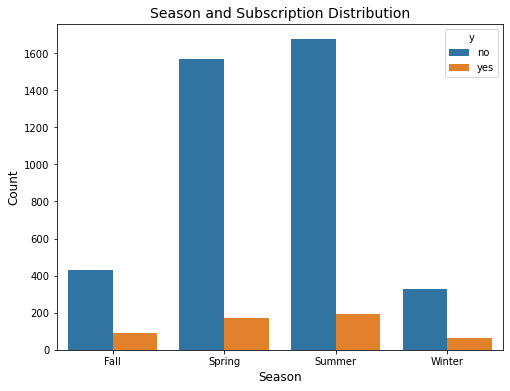

In [11]:
#This code creates a new figure with a size of 8x6 inches.
plt.figure(figsize=(8,6))

#Code to get a countplot of the season distribution for the target variable 'y'
sns.countplot(x='season', hue='y', data=bankdf)
plt.title('Season and Subscription Distribution', fontsize=14)
plt.xlabel('Season', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.show()

From the class distribution, we can observe that the majority of the calls were made in the summer season for both subscribed and non-subscribed customers. The next highest season for non-subscribed customers was Spring, while for subscribed customers, it was Fall. Interestingly, there were significantly fewer calls made in the winter season for both subscribed and non-subscribed customers. This indicates that seasonality may have some effect on subscription behavior, with more customers subscribing during the Fall season, while non-subscribed customers were more likely to be contacted during the Summer season.

Based on the analysis, it seems that there is no significant seasonal trend in the subscription behavior. However, the majority of subscriptions occurred in the summer season, followed by spring and fall. It is important to note that this is just a general trend and it may vary depending on other factors.

#### 7. Use the Pdays feature and find does it cause any effect on the subscription of the term using the bar plot.

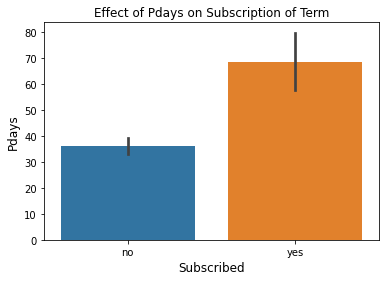

In [14]:
#This code creates a bar plot using Seaborn library
#Here x-axis represents the subscription status
#Here y-axis represents the number of days since the client was last contacted from a previous campaign
sns.barplot(x = 'y',y='pdays',data=bankdf)
plt.title('Effect of Pdays on Subscription of Term')
plt.xlabel('Subscribed', fontsize=12)
plt.ylabel('Pdays', fontsize=12)
plt.show()

Since the number of subscriptions is rising as the number of pdays rises, it follows that clients who have already been contacted or have been contacted more frequently are more inclined to subscribe. This would imply that cultivating a relationship with prospective customers and keeping in touch frequently may boost the likelihood of subscribing. The maximum value of pdays is 871, thus some clients may have been contacted more than two years ago, and it may not be relevant to take such records into account for drawing any conclusions.

#### 8. Replace the -1 as nan values for the P-days store.

In [12]:
#Replacing the value -1 in column 'pdays' with NaN
bankdf['pdays'] = bankdf['pdays'].replace(-1,np.nan)
bankdf.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y,season
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,NaN,0,unknown,no,Fall
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339.0,4,failure,no,Spring
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330.0,1,failure,no,Spring
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,NaN,0,unknown,no,Summer
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,NaN,0,unknown,no,Spring


#### 9. Once you are done with question number 8, do the same analysis as question number 7. And observe the difference between question number 7 and question number 9.

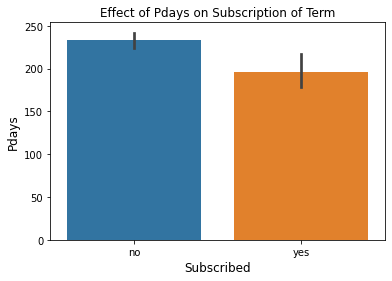

In [13]:
#This code creates a bar plot using Seaborn library
#Here x-axis represents the subscription status
#Here y-axis represents the number of days since the client was last contacted from a previous campaign from the bank dataset
sns.barplot(x = 'y',y='pdays',data=bankdf)
plt.title('Effect of Pdays on Subscription of Term')
plt.xlabel('Subscribed', fontsize=12)
plt.ylabel('Pdays', fontsize=12)
plt.show()

Between questions 7 and 9, there is a noticeable variation in the plot. When the Pdays grew in question 7, the plot indicated an increasing trend in the number of subscriptions. However, since the NaN values are not included in the plot, we can see that there is no obvious pattern in the Pdays column after swapping out the -1 values for NaN values. The increasing trend seen in question 7 was caused by the presence of -1 values, leading us to the conclusion that the Pdays feature has no discernible impact on the subscription status.

#### 10. Does the customer take the term subscription who has less than 0 balance?
Hint: Use any kind of plot which would you the related information to this question.

8.469945355191257
11.523999115239992


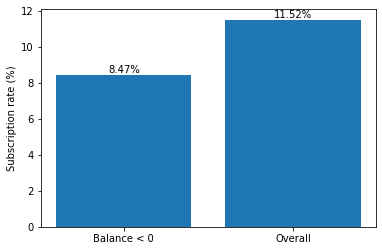

In [14]:
#This code calculates the subscription rate for clients with negative balance in their account.
sub_rate_negbal = (bankdf.loc[bankdf['balance'] < 0, 'y'].value_counts(normalize=True) * 100)['yes']
print(sub_rate_negbal)

#This code calculates the overall subscription rate for all the clients 
sub_rate_overall = (bankdf['y'].value_counts(normalize=True) * 100)['yes']
print(sub_rate_overall)

#Creating a bar plot to compare the subscription rate for customers with negative balance and overall subscription rate
plt.bar(['Balance < 0', 'Overall'], [sub_rate_negbal, sub_rate_overall])
plt.ylabel('Subscription rate (%)')

#This code adds text labels to the top of each bar in a bar plot
#It loops through the values in the list [sub_rate_negbal, sub_rate_overall]
#and their corresponding indices using the enumerate function
#For each value and index, it adding a text label to the top of the corresponding bar in the plot.
for i, v in enumerate([sub_rate_negbal, sub_rate_overall]):
    plt.text(i, v + 0.1, f"{v:.2f}%", ha='center')

plt.show()

Customers with a negative balance are less likely to subscribe to the term deposit than customers with a positive balance or no balance at all, according to the calculated subscription rate for customers with a balance of less than 0 (8.47%) and the overall subscription rate (11.52%). Therefore, a customer's likelihood of signing up for the term deposit may not be significantly influenced by having a negative balance.

#### 11. Use Pivot table to find the maximum balance for each type of job.

In [15]:
#This code creates a pivot table using the Pandas function that calculates the maximum balance for each job category
max_balance_by_job = pd.pivot_table(bankdf, index='job', values='balance', aggfunc=max)

#Sorting the maximum balance by job in descending order
max_balance_by_job = max_balance_by_job.sort_values(by='balance', ascending=False)

max_balance_by_job

,balance
job,
retired,71188
entrepreneur,42045
technician,27733
management,27359
housemaid,26965
services,26394
admin.,22171
self-employed,16430
blue-collar,16353


The output suggests that clients in the retired career category, followed by those in the entrepreneur job category, have the highest maximum balances. Customers in the category of unspecified jobs, on the other hand, have the lowest maximum balances. Overall, the maximum balance varies significantly amongst the various employment groups.

#### 12. Use the Age, balance, and Y column to plot the scatter plot and find what kind of relationship Age and balance had, and See the points which belong 0 and 1 class and how they are distributed.

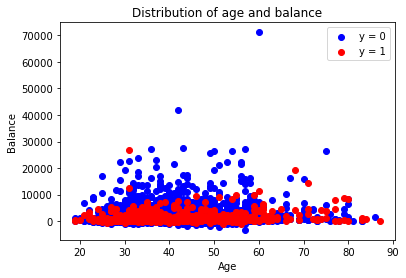

In [16]:
# Creating a new DataFrame with rows where the 'y' column is 'no'
y_0 = bankdf[bankdf['y'] == 'no']
# Creating a new DataFrame with rows where the 'y' column is 'yes'
y_1 = bankdf[bankdf['y'] == 'yes']

#Creating a new figure and axes objects using subplots() method from the matplotlib library
fig, ax = plt.subplots()

#Creating scatter plot for y=0 data points with age and balance as the axes
ax.scatter(y_0['age'], y_0['balance'], color='blue', label='y = 0')

#Creating scatter plot for y=1 data points with age and balance as the axes
ax.scatter(y_1['age'], y_1['balance'], color='red', label='y = 1')

plt.title('Distribution of age and balance')
ax.set_xlabel('Age')
ax.set_ylabel('Balance')
ax.legend()

plt.show()

The blue dots appear to be distributed higher on the y-axis for higher values of balance, indicating that customers with higher balances were less likely to subscribe to term deposits. However, there does not seem to be a clear relationship between age and balance. It seems like there is a weak positive relationship between age and balance. It is important to note that a scatter plot only shows the relationship between two variables and cannot establish causality or provide a complete picture of the data.

#### 13. Use the violin plot and also the box plot to find the distribution of the balance for each class of the Y column. And try to tell why we have a Violin plot and Box plot both rather than one.

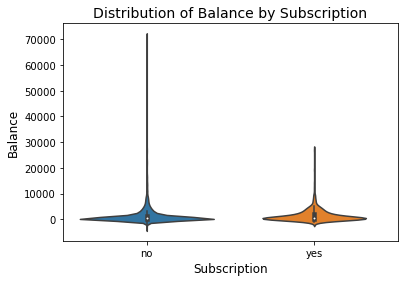

In [17]:
#creating a violin plot to visualize the distribution of balance for both classes of 'y'
sns.violinplot(x="y", y="balance", data=bankdf)

plt.title('Distribution of Balance by Subscription', fontsize=14)

plt.xlabel('Subscription', fontsize=12)
plt.ylabel('Balance', fontsize=12)

plt.show()

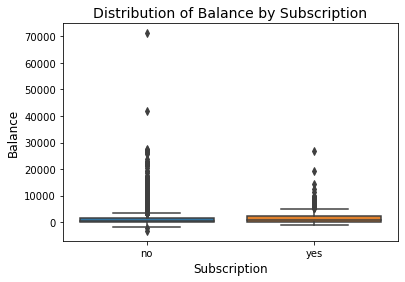

In [18]:
#Creating a box plot of balance distribution for two target classes 'yes' and 'no'
sns.boxplot(x="y", y="balance", data=bankdf)

plt.title('Distribution of Balance by Subscription', fontsize=14)

plt.xlabel('Subscription', fontsize=12)
plt.ylabel('Balance', fontsize=12)

plt.show()

The reason for having both violin plot and box plot is to provide complementary information about the distribution of the data.

A box plot summarizes the data by showing the median, quartiles, and any outliers in the data. It provides information about the central tendency, spread, and skewness of the distribution.

On the other hand, a violin plot not only shows the same information as the box plot but also shows the shape of the distribution more clearly. It represents the distribution with a kernel density plot, which shows the density of the data at different values along the y-axis. The width of the violin at a particular point represents the density of the data at that point.

Thus, a violin plot provides a more detailed view of the distribution than a box plot, especially when the data is multimodal or has outliers. However, a box plot is easier to read and more familiar to many people, so using both types of plots can provide a more complete picture of the data.

The median balance for customers who subscribed to the term deposit is higher than that of customers who did not subscribe.
Customers who subscribed to the term deposit have a wider range of balances than customers who did not subscribe.

#### 14. Use a pie plot to know the Proportion(distribution) of the defaulters and non-defaulters.
Note: Try to explore more parameters that are there in the pie-plot method.

no     4445
yes      76
Name: default, dtype: int64


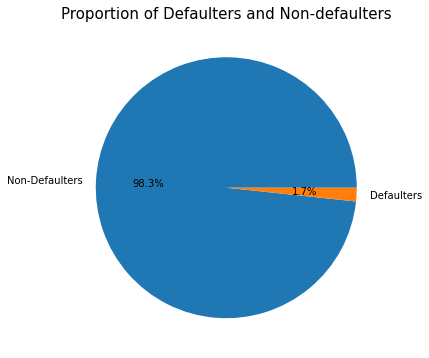

In [19]:
#Counting the number of values in the 'default' column and storing the count in 'default_counts' variable
default_counts = bankdf['default'].value_counts()
print(default_counts)

#This code creates a new figure with a size of 10x6 inches.
plt.figure(figsize=(10,6))
labels = ['Non-Defaulters', 'Defaulters']

#This code creates a pie chart using the value counts of the 'default' column
#corresponding labels and autopct values displayed as percentages with one decimal place
#font size of the text set to 10
plt.pie(default_counts.values,labels = labels,autopct = '%1.1f%%',textprops={'fontsize': 10})

plt.title('Proportion of Defaulters and Non-defaulters', fontdict = {'fontsize' : 15,'color' : 'black'})


plt.show()

Insights:

From the pie chart, it is evident that the number of non-defaulters is significantly higher than the number of defaulters.
The proportion of defaulters to non-defaulters is quite small, indicating that the bank's credit risk assessment methods are efficient.

Suggestions:

As the proportion of defaulters is low, the bank should continue its current credit risk assessment practices.
The bank should focus on retaining existing customers by offering them better services and products, as the majority of customers are non-defaulters.

#### 15. Use Box plot and strip plot to know the distribution of the Pdays with respect to Y classes and differentiate both plots.

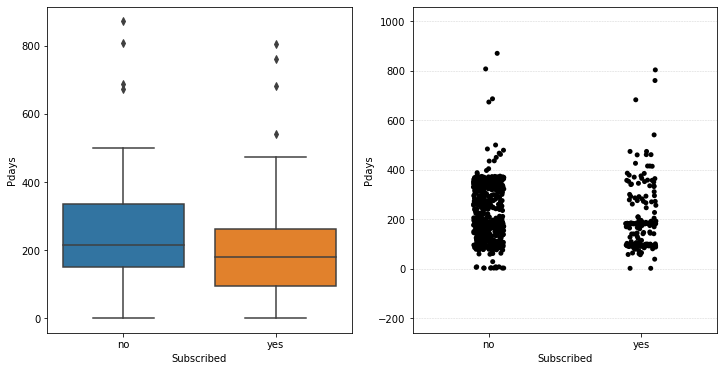

In [20]:
data = bankdf[['y', 'pdays']]

#This code initializes a figure with two subplots side-by-side, with a size of 12 inches in width and 6 inches in height
#The ax variable is a NumPy array containing the two axes objects
fig, ax = plt.subplots(ncols=2, figsize=(12, 6))

#This code generates a boxplot to visualize the distribution of the "pdays" variable for the "yes" and "no" classes of the "y"
sns.boxplot(x='y', y='pdays', data=bankdf, ax=ax[0])
ax[0].set_xlabel('Subscribed')
ax[0].set_ylabel('Pdays')

#This code generates a stripplot to visualize the distribution of the "pdays" variable for the "yes" and "no" classes of "y"
sns.stripplot(x='y', y='pdays', data=bankdf, jitter=True, color='black', ax=ax[1])
ax[1].set_xlabel('Subscribed')
ax[1].set_ylabel('Pdays')

# This for loop adds "--" lines to the second subplot at the y-tick positions:
for y in ax[1].get_yticks():
    ax[1].axhline(y=y, color='lightgray', linestyle='--', linewidth=0.5)

plt.show()

The box plot shows the distribution of pdays values for each y class. 
It displays the median, quartiles, and outliers in the data. 
The strip plot shows the individual pdays values for each y class. 
It can help identify any clusters or patterns in the data

From the above visualization we can see that the pdays variable is a useful predictor of the y outcome, 
as there appears to be a noticeable difference in the distribution of pdays values between the two y classes.

Based on the Box plot, we can observe that the median pdays for customers who subscribed to the term deposit is lower compared to those who didn't subscribe. Also, we can see that there are many outliers in the group of customers who didn't subscribe, which indicates that some customers were not contacted for a long time.

The Strip plot is useful in visualizing the distribution of pdays for both classes of Y. We can see that for customers who subscribed to the term deposit, most of them were contacted within 100 days, whereas for customers who didn't subscribe, there is a wider range of pdays. This suggests that contacting customers within a shorter period of time can increase the chances of them subscribing.

Based on these insights, we can suggest that the bank should focus on contacting customers who have not been contacted for a long time and try to reach out to them within a shorter period to increase the chances of subscription. Additionally, the bank can prioritize customers who have a lower value of pdays for targeted marketing campaigns.

## INFERENCES

Insights - 
1. Customers who had no default on credit, had a higher average yearly balance, and were contacted previously were more likely to subscribe to the term deposit.
2. the subscription rates are higher during the summer and spring seasons. 
3. The insight is that the longer the time since last contact (pdays), the less likely a customer is to subscribe. 
4.  Customers with lower balance or negative balance are less likely to subscribe.

Area of focus - 
1. Explore the reasons behind the lower subscription rates during fall and winter and try to identify strategies to improve the rates during these seasons.
2. Providing more financial education and awareness to customers to increase their understanding and interest in banking services
3. Reducing the barriers or difficulties in the subscription process to make it easier and more convenient for customers.
4. We can target the age group between 30-50 years.

Suggestions - 
1. Leverage social media platforms and other digital marketing channels to reach out to customers during the spring and summer months.
2. The suggestion would be to have a systematic follow-up plan in place, where potential customers are contacted at regular intervals with targeted marketing campaigns
3. Targeting the audience in the job categories of management and technician may be a viable strategy, as these categories are among the top 5 in terms of average balance held.
4. The bank could focus on improving their customer feedback mechanisms after the marketing campaigns to understand the requirements of customers and use technology to improve the customer experience. 

Learnings - 

1. Understanding how to approach and frame a business problem and translate it into a data analysis project
2. Familiarity with data cleaning and preprocessing techniques to make the data usable for analysis
3. Knowledge of various exploratory data analysis techniques to understand and gain insights from the data
4. Experience with data visualization tools to effectively communicate insights and findings to stakeholders
5. Ability to work with different data analysis libraries and tools, and to choose the most appropriate ones for the task at hand.

In future projects, we will use these skills to approach new business problems with a critical and data-driven mindset, and to effectively communicate insights and recommendations to stakeholders. We will also continue to learn and explore new tools and techniques in data analysis to stay current with the rapidly evolving field.